<a href="https://colab.research.google.com/github/IsabelJnz/NLP-Sentiment-Analysis/blob/main/NLP_ChatGPT_thetweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the future of Chat GPT in society?



# EDA


In [1]:
%pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# imports
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import numpy as np
import nltk 

In [3]:
with open('tweets.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader)
    data = [row for row in reader]

df = pd.DataFrame(data, columns=header)

In [4]:
df.head()

user_name  \
0                              ADtweets   
1                          debbie moore   
2  Web design in Oslo and Around Europe   
3                 Aarti Uppal Singla 🇮🇳   
4                           Matt Schwab   

                                                text user_location  \
0  #ChatGPT is really changing and shaking up the...                 
1  So #ChatGPT is just another #woje, #Leftist to...                 
2  Unleash Your Entrepreneurial Potential with Th...  Oslo, Norway   
3  Chat, golgappa, papri, tikki. Indians have the...     New Delhi   
4  The AI experts have not made such comments bc ...                 

                                    user_description  \
0                                                      
1  Conservative, U.S. Army Retired.\nSt. Louis Ca...   
2  We Provide Aesthetic Websites, Ecommerce, SEO,...   
3  Visual artist. Paints, photographs & designs. ...   
4  “A little bit of everything all of the time.” ...   

                user_created user_followers user_friends user_favourites  \
0  2020-01-26 21:05:14+00:00          422.0        381.0           15407   
1  2014-08-01 13:45:24+00:00          167.0        136.0           60819   
2  2009-06-20 17:03:17+00:00         1014.0       2945.0            1934   
3  2009-08-28 14:39:16+00:00          655.0        535.0           23364   
4  2012-01-31 02:10:01+00:00          347.0        863.0           13381   

  user_verified                       date                        hashtags  \
0         False  2023-02-06 17:26:19+00:00                     ['ChatGPT']   
1         False  2023-02-06 17:26:18+00:00  ['ChatGPT', 'woje', 'Leftist']   
2         False  2023-02-06 17:26:16+00:00         ['ChatGPT', 'Business']   
3         False  2023-02-06 17:26:12+00:00                     ['ChatGPT']   
4         False  2023-02-06 17:26:05+00:00                       ['facts']   

                source  
0   Twitter for iPhone  
1  Twitter for Android  
2      Twitter Web App  
3  Twitter for Android  
4   Twitter for iPhone

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74675 entries, 0 to 74674
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         74666 non-null  object
 1   text              74666 non-null  object
 2   user_location     74657 non-null  object
 3   user_description  74656 non-null  object
 4   user_created      74655 non-null  object
 5   user_followers    74655 non-null  object
 6   user_friends      74655 non-null  object
 7   user_favourites   74655 non-null  object
 8   user_verified     74655 non-null  object
 9   date              74654 non-null  object
 10  hashtags          74654 non-null  object
 11  source            74645 non-null  object
dtypes: object(12)
memory usage: 6.8+ MB


In [6]:
df.dtypes

user_name           object
text                object
user_location       object
user_description    object
user_created        object
user_followers      object
user_friends        object
user_favourites     object
user_verified       object
date                object
hashtags            object
source              object
dtype: object

In [7]:
df.isnull().sum()

user_name            9
text                 9
user_location       18
user_description    19
user_created        20
user_followers      20
user_friends        20
user_favourites     20
user_verified       20
date                21
hashtags            21
source              30
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

user_name           0
text                0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
hashtags            0
source              0
dtype: int64

In [10]:
# checking if there are many "empty" columns
df.replace('', np.nan, inplace=True)

In [11]:
df.isnull().sum()

user_name               0
text                    2
user_location       18260
user_description     3746
user_created            2
user_followers          2
user_friends            2
user_favourites         2
user_verified           2
date                    2
hashtags            15447
source                  3
dtype: int64

In [12]:
df.shape

(74645, 12)

since there are many empty values in user_location and user_description, we want to drop these columns because they also don't bring that much added value to our analysis

In [13]:
df = df.drop('user_location', axis=1)

In [14]:
df = df.drop('user_description', axis=1)

In [15]:
df.isnull().sum()

user_name              0
text                   2
user_created           2
user_followers         2
user_friends           2
user_favourites        2
user_verified          2
date                   2
hashtags           15447
source                 3
dtype: int64

it's still obvious that there are many "empty" values in hashtags, but that's due to the fact, that the users werent using any hashtags, so that's okay\\
so in a following step we want to drop all nan values in the dataset wihtout considering the hashtag column

In [16]:
# drop all rows with NaN values, except for 'hashtags'
df = df.dropna(subset=df.columns.difference(['hashtags']))

In [17]:
df.isnull().sum()

user_name              0
text                   0
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
hashtags           15445
source                 0
dtype: int64

In [18]:
df.shape

(74642, 10)

Looking at the attribute "date" -> visualizing when the tweets were posted / published:

In [19]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [20]:
tweets_per_day = df['date'].dt.strftime('%y-%m-%d').value_counts().sort_index().reset_index(name='counts')

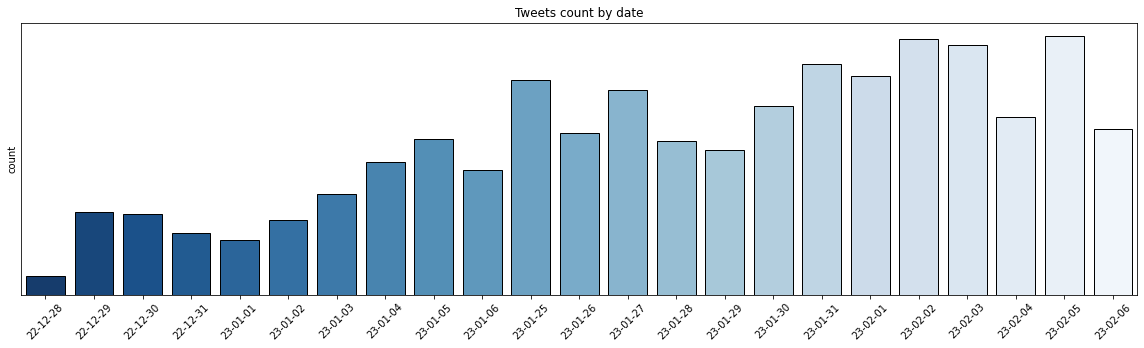

In [21]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='index', y='counts', data=tweets_per_day,edgecolor = 'black',ci=False, palette='Blues_r')
plt.title('Tweets count by date')
plt.yticks([])
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.xlabel('')
plt.show()

Visualizing the attribute "source" in the dataset:

In [22]:
# Source/ Value Count/Distribution of the Sources
df['source'].value_counts()

Twitter Web App        33115
Twitter for iPhone     14867
Twitter for Android    12606
Buffer                  1502
TweetDeck               1333
                       ...  
KryptonAiNews              1
thecrowdview               1
One News Page              1
Post Wall :: Stream        1
NotePD.com                 1
Name: source, Length: 384, dtype: int64

In [26]:
# Plot the top value_counts
df['source'].value_counts().nlargest(10)

Twitter Web App        33115
Twitter for iPhone     14867
Twitter for Android    12606
Buffer                  1502
TweetDeck               1333
LinkedIn                1288
Hootsuite Inc.          1020
Twitter for iPad         866
IFTTT                    833
shem0304                 445
Name: source, dtype: int64

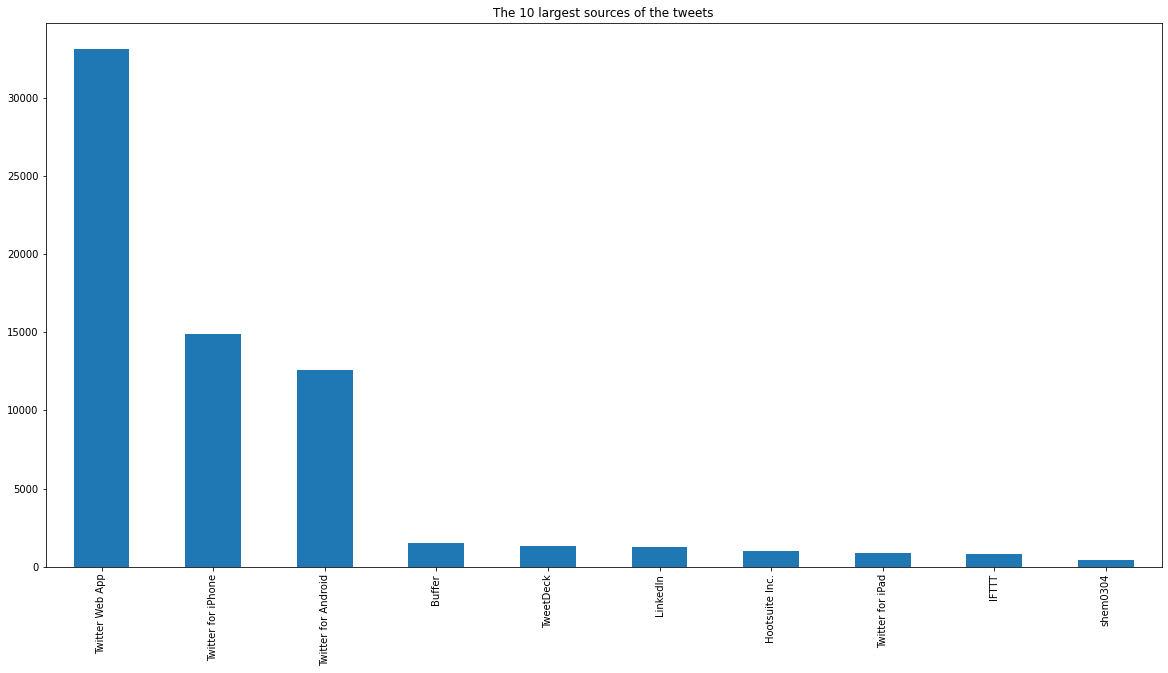

In [28]:
# Plot the top value_counts
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(10).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('The 10 largest sources of the tweets')
plt.show()

In [29]:
print(f" Dataframe Shape: {df.shape}")

 Dataframe Shape: (74642, 10)


In [30]:
df['user_followers'] = pd.to_numeric(df['user_followers'], errors='coerce')

In [31]:
print(f" The user with the most followers is {df[df['user_followers'] == df['user_followers'].max()]['user_name'].iloc[0]}.")

 The user with the most followers is NDTV.


In [32]:
df['user_friends'] = pd.to_numeric(df['user_friends'], errors='coerce')

In [33]:
print(f" The user with the most friends is {df[df['user_friends'] == df['user_friends'].max()]['user_name'].iloc[0]}.")

 The user with the most friends is M LeMont.


Visualizing the attribute "user_verified" in the dataset:

In [34]:
counts = df['user_verified'].value_counts()
print(counts)

False    72055
True      2587
Name: user_verified, dtype: int64


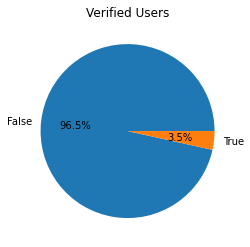

In [35]:
counts.plot(kind='pie', autopct='%1.1f%%', labels=counts.index)
plt.title('Verified Users')
plt.ylabel("");

Now that the data is fundamentally cleaned, we want to take a look at the column 'text' in the dataframe:

In [ ]:
print(f"There are {str(df['text'].isnull().sum())} tweets with no content.")

There are 0 tweets with no content.


### Data preparation for model training

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from tqdm.auto import tqdm
import matplotlib.style as style
style.use('fivethirtyeight')
from numpy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc, plot_roc_curve

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

#remobe one character words
def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   
    
#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)


#break sentences to individual word list
def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    


def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)

def give_emoji_free_text(text):
    """
    Removes emoji's from tweets
    Accepts:
        Text (tweets)
    Returns:
        Text (emoji free tweets)
    """
    emoji_list = [c for c in text if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

def url_free_text(text):
    '''
    Cleans text from urls
    '''
    text = re.sub(r'http\S+', '', text)
    return text


def clean_text(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    stem,
    remove_numbers,
    #give_emoji_free_text,
    url_free_text
]
    for step in _steps:
        text=step(text)
    return text   

In [ ]:
df2 = df.copy()

In [ ]:
df2.isnull().sum()

user_name              0
text                   0
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
hashtags           24184
source                 0
dtype: int64

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.isnull().sum()

user_name          0
text               0
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
hashtags           0
source             0
dtype: int64

In [ ]:
df2["text"] = df2["text"].astype(str)
df2["text"] = [x.replace(':',' ') for x in df2["text"]]

In [ ]:
df2['clean_text'] = pd.Series([clean_text(i) for i in tqdm(df2['text'])])

  0%|          | 0/103702 [00:00<?, ?it/s]

In [ ]:
df2["hashtags"] = df2["hashtags"].astype(str)
df2["hashtags"] = [x.replace(':',' ') for x in df2["hashtags"]]

In [ ]:
df2['clean_hashtags'] = pd.Series([clean_text(i) for i in tqdm(df2['hashtags'])])

  0%|          | 0/103702 [00:00<?, ?it/s]

In [ ]:
df_clean = df2[['clean_text', 'clean_hashtags']]

In [ ]:
#df_clean_over_time = df2[['clean_text', 'clean_hashtags', 'date']]

In [ ]:
#df_clean_over_time.to_csv('cleaned_tweets_over_time.csv', encoding='utf-8', index=False)

### Worldcloud

In [ ]:
text = df_clean["clean_text"].values

In [ ]:
ls = []

for i in text:
    ls.append(str(i))

In [ ]:
ls_string = " ".join(map(str, ls))

print(ls_string)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
ls_new=list(ls_string.split())

In [ ]:
print(ls_new)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
mein_dict = dict.fromkeys(ls_new)
ls_clean = list(mein_dict)

In [ ]:
ls_clean[:5]

['chatgpt', 'realli', 'chang', 'shake', 'inform']

(-0.5, 1599.5, 799.5, -0.5)

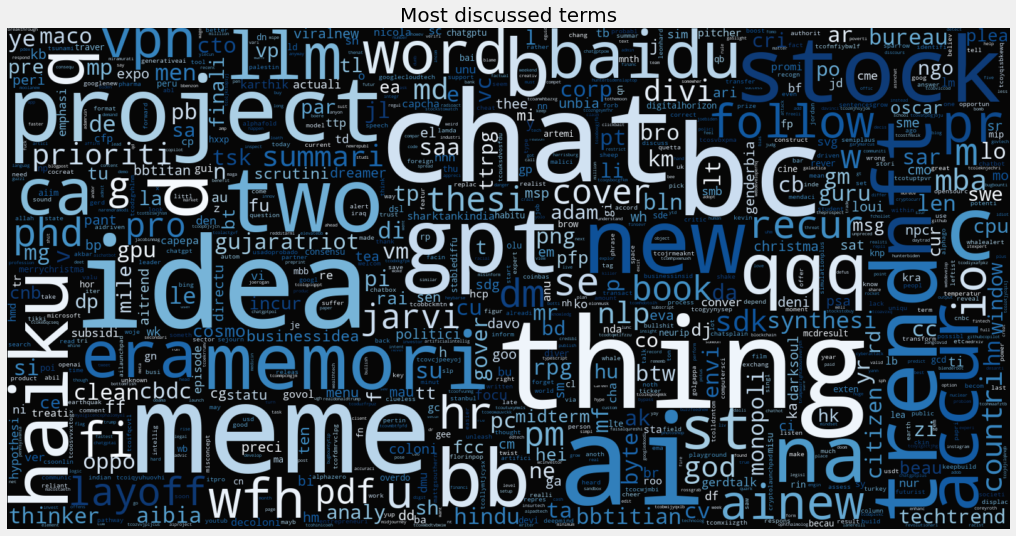

In [ ]:
# The wordcloud of text
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(ls_clean))
plt.title("Most discussed terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Blues_r' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

In [ ]:
hashtags = df_clean["clean_hashtags"].values

In [ ]:
ls = []

for i in hashtags:
    ls.append(str(i))

In [ ]:
ls_string = " ".join(map(str, ls))

print(ls_string)

chatgpt chatgpt woje leftist chatgpt busi chatgpt fact chatgpt chatgpt chatgpt chatgpt playground whale usdt coinbas unknown generativeai chatgpt openai ai computersci chatgpt ai chatbot chatgpt chatsplain chatgpt product chatgpt ai ai chatgpt chatgpt cheat earthquak chatgpt stanbul tsunami chatgpt turkey chatgpt meme ai ailaunchpad cryptolaunchpad chatgpt chatgpt artificialintellig aiproject chatgpt chatgpt chatgpt ai artificialintellig generativeai chatgpt chatgpt trumpwasrightabouteveryth biden hunterbiden hunterbidenslaptop gaslight chatgpt itexpert cyberattack chatgpt chatgpt chatgpt chatgpt chatgpt galactica chatgpt chatgpt chatgpt chatgpt wealthtech googl googledoodl chatgpt chathot chat app world chatgpt chatgpt aichatbot bing blenderbot edtech insurtech financ finsevr ai edtech chatgpt narendramodi joebiden chatgpt plan chatgpt chatgpt chatgpt chatgpt chatgpt chatgpt blogpost chatgpt chatgpt cryptocurr chatgpt ai chatgpt artifici intellig medicin chatgpt chatgpt chatgpt chatgp

In [ ]:
ls_new=list(ls_string.split())

In [ ]:
print(ls_new)

['chatgpt', 'chatgpt', 'woje', 'leftist', 'chatgpt', 'busi', 'chatgpt', 'fact', 'chatgpt', 'chatgpt', 'chatgpt', 'chatgpt', 'playground', 'whale', 'usdt', 'coinbas', 'unknown', 'generativeai', 'chatgpt', 'openai', 'ai', 'computersci', 'chatgpt', 'ai', 'chatbot', 'chatgpt', 'chatsplain', 'chatgpt', 'product', 'chatgpt', 'ai', 'ai', 'chatgpt', 'chatgpt', 'cheat', 'earthquak', 'chatgpt', 'stanbul', 'tsunami', 'chatgpt', 'turkey', 'chatgpt', 'meme', 'ai', 'ailaunchpad', 'cryptolaunchpad', 'chatgpt', 'chatgpt', 'artificialintellig', 'aiproject', 'chatgpt', 'chatgpt', 'chatgpt', 'ai', 'artificialintellig', 'generativeai', 'chatgpt', 'chatgpt', 'trumpwasrightabouteveryth', 'biden', 'hunterbiden', 'hunterbidenslaptop', 'gaslight', 'chatgpt', 'itexpert', 'cyberattack', 'chatgpt', 'chatgpt', 'chatgpt', 'chatgpt', 'chatgpt', 'galactica', 'chatgpt', 'chatgpt', 'chatgpt', 'chatgpt', 'wealthtech', 'googl', 'googledoodl', 'chatgpt', 'chathot', 'chat', 'app', 'world', 'chatgpt', 'chatgpt', 'aichatbot'

In [ ]:
mein_dict = dict.fromkeys(ls_new)
ls_clean = list(mein_dict)


In [ ]:
ls_clean[:5]

['chatgpt', 'woje', 'leftist', 'busi', 'fact']

(-0.5, 1599.5, 799.5, -0.5)

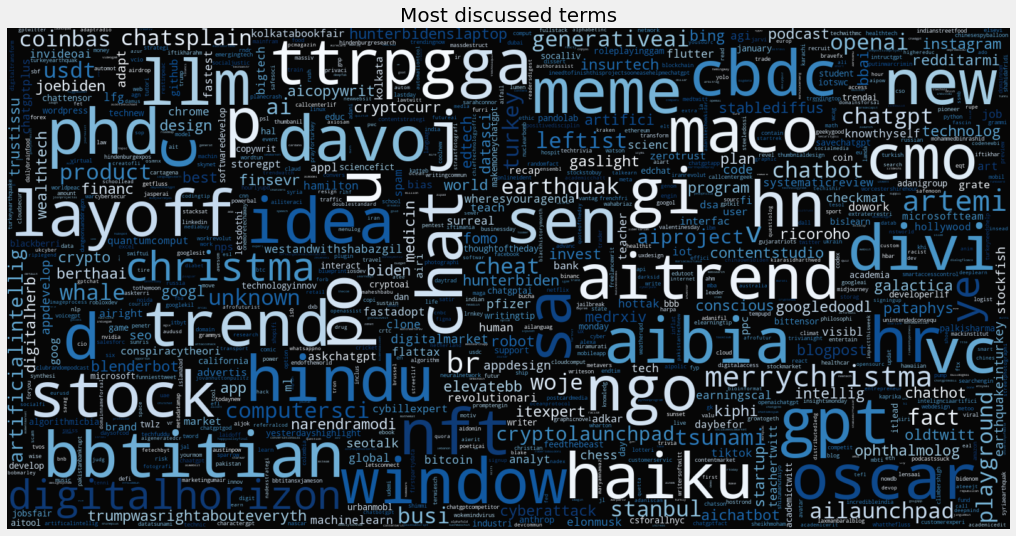

In [ ]:
# The wordcloud of Hashtags
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=1000, max_font_size= 100,  width=1600, height=800)
wc.generate(" ".join(ls_clean))
plt.title("Most discussed terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Blues_r' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

saving the cleaned data to a new csv file:

In [ ]:
df_clean.to_csv('cleaned_tweets.csv', encoding='utf-8', index=False)

# NLTK


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
stemmer = SnowballStemmer('english')

In [ ]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

### NLTK 'Text'

In [ ]:
df_clean['clean_text'] = df_clean['clean_text'].astype(str)

<ipython-input-76-535b26912987>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clean_text'] = df_clean['clean_text'].astype(str)


In [ ]:
doc_sample = df_clean['clean_text'].iloc[1]
print('original document: ')

words = []

for word in doc_sample.split(' '):
    words.append(word)
    
    
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['chatgpt', 'anoth', 'woje', 'leftist', 'tool', 'noth', '', 'tcosvbxpma']


 tokenized and lemmatized document: 
['chatgpt', 'anoth', 'woje', 'leftist', 'tool', 'noth', 'tcosvbxpma']


In [ ]:
words = []

for i in df_clean['clean_text']:
        words.append(i.split(' '))

In [ ]:
dictionary = gensim.corpora.Dictionary(words)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abil
1 becom
2 chang
3 chatgpt
4 communic
5 construct
6 could
7 critic
8 forget
9 inform
10 possibl


### NLTK 'Hashtags'

In [ ]:
df_clean['clean_hashtags'] = df_clean['clean_hashtags'].astype(str)

<ipython-input-80-3346fd8d93d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clean_hashtags'] = df_clean['clean_hashtags'].astype(str)


In [ ]:
doc_sample = df_clean['clean_hashtags'].iloc[1]
print('original document: ')

words = []

for word in doc_sample.split(' '):
    words.append(word)
    
    
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['chatgpt', 'woje', 'leftist']


 tokenized and lemmatized document: 
['chatgpt', 'woje', 'leftist']


In [ ]:
words = []

for i in df_clean['clean_hashtags']:
        words.append(i.split(' '))

In [ ]:
dictionary = gensim.corpora.Dictionary(words)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 chatgpt
1 leftist
2 woje
3 busi
4 fact
5 playground
6 coinbas
7 unknown
8 usdt
9 whale
10 generativeai


# Topic Modelling

<b>ChatGPT:</b> \\
Topic modeling is a technique used in natural language processing (NLP) and machine learning to automatically extract the underlying themes or topics from a large corpus of text data. The goal of topic modeling is to discover the latent topics that are present in the text data, and to assign each document or piece of text to one or more of these topics.<br>
Topic modeling is a powerful tool for analyzing large volumes of text data, and it has a wide range of applications in many industries, including journalism, marketing, and finance. However, it is important to note that topic modeling is not a perfect method, and the results should always be reviewed and validated by a human expert.

## Time Series Analysis

# Sentiment Analysis

<b>ChatGPT:</b> \\
Sentiment analysis, also known as opinion mining, is a technique used in natural language processing (NLP) and machine learning to automatically analyze and classify the sentiment or emotion expressed in a piece of text. The goal of sentiment analysis is to determine whether a piece of text expresses a positive, negative, or neutral sentiment, and to what degree. <br>
Sentiment analysis is a powerful tool for understanding and analyzing customer sentiment, and it has a wide range of applications in many industries, including marketing, customer service, and finance. However, it is important to note that sentiment analysis is not always accurate, and the results should always be reviewed and validated by a human expert.

## Time Series Analysis

# Conclusion